In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

In [3]:
train_df.shape

(60000, 785)

In [4]:
test_df.shape

(10000, 785)

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
type(train_df)

pandas.core.frame.DataFrame

In [7]:
train = np.array(train_df, dtype='float32')

In [8]:
type(train)

numpy.ndarray

In [9]:
test = np.array(test_df, dtype='float32')

In [10]:
type(train)

numpy.ndarray

In [11]:
test = np.array(test_df, dtype='float32')

In [12]:
xtrain = train[:,1:]/255
ytrain = train[:,0]
xtest = test[:,1:]/255
ytest = test[:,0]

In [13]:
xtrain.shape

(60000, 784)

In [14]:
xtrain = xtrain.reshape(xtrain.shape[0],*(28,28,1))
xtest = xtest.reshape(xtest.shape[0],*(28,28,1))

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [16]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [18]:
history = model.fit(xtrain, ytrain, batch_size=512, epochs=20, verbose=1)

Epoch 1/20
118/118 [==============================] - 21s 159ms/step - loss: 1.0382 - accuracy: 0.6317
Epoch 2/20
118/118 [==============================] - 18s 151ms/step - loss: 0.6190 - accuracy: 0.7678
Epoch 3/20
118/118 [==============================] - 18s 154ms/step - loss: 0.5421 - accuracy: 0.7997
Epoch 4/20
118/118 [==============================] - 18s 154ms/step - loss: 0.4956 - accuracy: 0.8191
Epoch 5/20
118/118 [==============================] - 18s 154ms/step - loss: 0.4674 - accuracy: 0.8316
Epoch 6/20
118/118 [==============================] - 18s 156ms/step - loss: 0.4346 - accuracy: 0.8455
Epoch 7/20
118/118 [==============================] - 18s 153ms/step - loss: 0.4125 - accuracy: 0.8517
Epoch 8/20
118/118 [==============================] - 18s 154ms/step - loss: 0.3924 - accuracy: 0.8604
Epoch 9/20
118/118 [==============================] - 18s 156ms/step - loss: 0.3788 - accuracy: 0.8628
Epoch 10/20
118/118 [==============================] - 19s 158ms/step - l

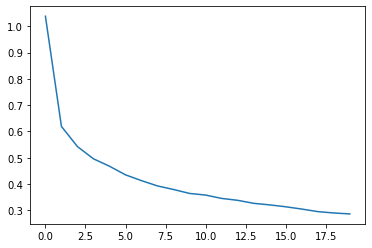

In [19]:
plt.plot(history.history['loss'])

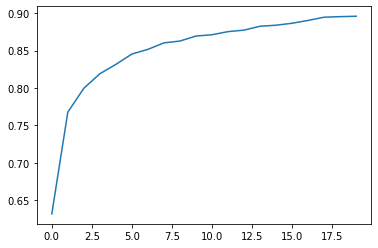

In [20]:
plt.plot(history.history['accuracy'])

In [21]:
xpred = model.predict(xtest)

In [22]:
pre_class = np.argmax(xpred, axis=1)

In [23]:
pre_class[0]

0

In [24]:
pre_class[3]

6

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
confusion_matrix(ytest, pre_class)

array([[848,   3,  34,  21,   7,   0,  75,   0,  12,   0],
       [  2, 978,   6,   7,   2,   1,   3,   0,   1,   0],
       [ 11,   1, 836,   6,  78,   0,  62,   0,   6,   0],
       [ 24,   9,  26, 875,  49,   0,  16,   0,   0,   1],
       [  3,   0,  41,  14, 872,   0,  67,   0,   2,   1],
       [  2,   0,   0,   0,   0, 961,   0,  21,   2,  14],
       [136,   2,  66,  23, 121,   0, 642,   0,  10,   0],
       [  0,   0,   0,   0,   0,  17,   0, 913,   0,  70],
       [  0,   1,   6,   2,   3,   2,   9,   1, 973,   3],
       [  0,   0,   0,   0,   0,   4,   0,  25,   2, 969]], dtype=int64)

<AxesSubplot:>

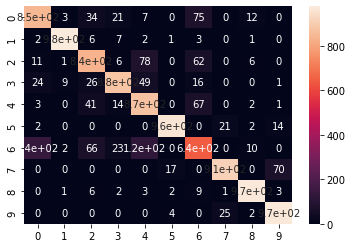

In [27]:
sns.heatmap(confusion_matrix(ytest, pre_class), annot=True)

<AxesSubplot:>

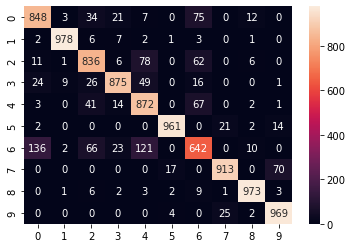

In [28]:
sns.heatmap(confusion_matrix(ytest, pre_class), annot=True, fmt='d')

<AxesSubplot:>

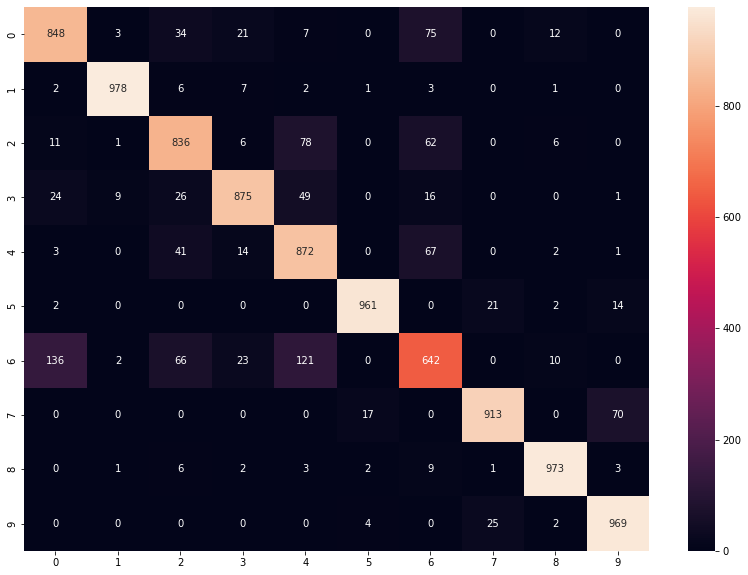

In [29]:
plt.figure(figsize=(14,10))
sns.heatmap(confusion_matrix(ytest, pre_class), annot=True, fmt='d')

In [30]:
print(classification_report(ytest, pre_class))

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      1000
         1.0       0.98      0.98      0.98      1000
         2.0       0.82      0.84      0.83      1000
         3.0       0.92      0.88      0.90      1000
         4.0       0.77      0.87      0.82      1000
         5.0       0.98      0.96      0.97      1000
         6.0       0.73      0.64      0.69      1000
         7.0       0.95      0.91      0.93      1000
         8.0       0.97      0.97      0.97      1000
         9.0       0.92      0.97      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

